In [1]:
!pip install librosa

In [2]:
import os
import librosa
import librosa.display
import IPython
import IPython.display as ipd
import numpy as np
import matplotlib.pyplot as plt
import os, glob, pickle

# Load audio file

In [45]:
file1 = '../raw_data/testing/4Vl6AeEkAg4_1.wav'

In [46]:
file2 = '../raw_data/testing/4Vl6AeEkAg4_2.wav'

In [47]:
file3 = '../raw_data/testing/4Vl6AeEkAg4_3.wav'

In [51]:
ipd.Audio(file1)

ValueError: rate must be specified when data is a numpy array or list of audio samples.

In [49]:
ipd.Audio(file2)

ValueError: rate must be specified when data is a numpy array or list of audio samples.

In [50]:
scl1, sr1 = librosa.load(file1)

/home/alexlaurent/.pyenv/versions/3.8.6/envs/backinthessr/lib/python3.8/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


FileNotFoundError: [Errno 2] No such file or directory: '../raw_data/testing/4Vl6AeEkAg4_1.wav'

In [ ]:
scl2, sr2 = librosa.load(file2)

In [ ]:
scl3, sr3 = librosa.load(file3)

# Plot Spectrogram

In [ ]:
frame_size = 2048
hop_size = 512

In [ ]:
scale = librosa.stft(scl1,n_fft=frame_size,hop_length = hop_size)

In [ ]:
Y_scale = np.abs(scale) **2

In [ ]:
def plot_spectrogram(Y, sr, hop_length, y_axis="linear"):
    plt.figure(figsize=(25, 10))
    librosa.display.specshow(Y, 
                             sr=sr, 
                             hop_length=hop_length, 
                             x_axis="time", 
                             y_axis=y_axis)
    plt.colorbar(format="%+2.f")

In [ ]:
Y_log_scale = librosa.power_to_db(Y_scale)
plot_spectrogram(Y_log_scale, sr1, hop_size, y_axis="log");

# Extract acoustic features

In [ ]:
mfcc1 = librosa.feature.mfcc(y=scl1, sr=sr1, n_mfcc=40)

In [ ]:
mfcc1.shape

In [ ]:
stft=np.abs(librosa.stft(scl1))
chroma1 = librosa.feature.chroma_stft(S=stft, sr=sr1)

In [ ]:
chroma1.shape

In [ ]:
mel1 = librosa.feature.melspectrogram(scl1, sr=sr1)

In [ ]:
mel1.shape

In [ ]:
cent1 = librosa.feature.spectral_centroid(y=scl1, sr=sr1)

In [ ]:
cent1.shape

In [9]:
#DataFlair - Extract features (mfcc, chroma, mel) from a sound file
def extract_feature(file_name, mfcc, chroma, mel, centroid, tonnetz):
    y, sr = librosa.load(file_name)
    if chroma:
        stft=np.abs(librosa.stft(y))
        result=np.array([])
    if mfcc:
        mfccs=np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
        result=np.hstack((result, mfccs))
    if chroma:
        chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sr).T,axis=0)
        result=np.hstack((result, chroma))
    if mel:
        mel=np.mean(librosa.feature.melspectrogram(y, sr=sr).T,axis=0)
        result=np.hstack((result, mel))
    if centroid: 
        cent=np.mean(librosa.feature.spectral_centroid(y=y, sr=sr).T, axis=0)
        result=np.hstack((result,cent))
    if tonnetz:
        ton = np.mean(librosa.feature.tonnetz(y=y, sr=sr).T, axis=0)
        result=np.hstack((result,ton))
    return result

In [10]:
def load_data(test_size=0.2):
    X=[]
#     y=[]
    for file in glob.glob("WAV_test/*.wav"):
        file_name=os.path.basename(file)
#         emotion=emotions[file_name.split("-")[2]]
#         if emotion not in observed_emotions:
#             continue
        feature=extract_feature(file, mfcc=True, chroma=True, mel=True,centroid=True, tonnetz=True)
        X.append(feature)
#         y.append(emotion)
    return X

In [11]:
features = load_data()

In [12]:
import pandas as pd

In [13]:
features = pd.DataFrame(features)

In [14]:
features

""


In [15]:
features.shape

(0, 0)

In [16]:
#DataFlair - Load the data and extract features for each sound file
# def load_data(test_size=0.2):
#     x,y=[],[]
#     for file in glob.glob("D:\\DataFlair\\ravdess data\\Actor_*\\*.wav"):
#         file_name=os.path.basename(file)
#         emotion=emotions[file_name.split("-")[2]]
#         if emotion not in observed_emotions:
#             continue
#         feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
#         x.append(feature)
#         y.append(emotion)
#     return train_test_split(np.array(x), y, test_size=test_size, random_state=9)

# Sound duration

In [17]:
import seaborn as sns

In [26]:
import librosa

librosa.get_duration(filename='../raw_data/testing/4Vl6AeEkAg4_3.wav')

23.173514739229024

In [36]:
inputdir= "../raw_data/Converted_data/"

In [38]:
duration = []
for wav in os.listdir(inputdir):
    time=librosa.get_duration(filename=f'../raw_data/Converted_data/{wav}')
    duration.append(time)

<AxesSubplot:ylabel='Count'>

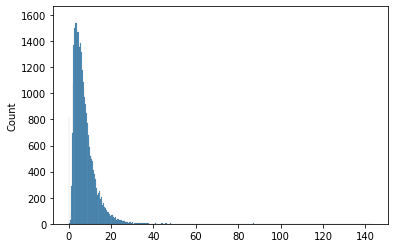

In [39]:
sns.histplot(duration)

/home/alexlaurent/.pyenv/versions/3.8.6/envs/backinthessr/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

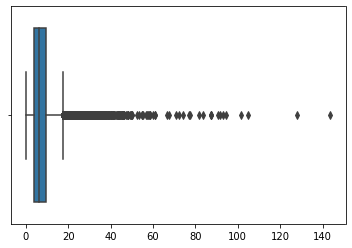

In [40]:
sns.boxplot(duration)

In [44]:
duration

AttributeError: 'list' object has no attribute 'describe'